In [1]:
import numpy as np
import scipy as sp
import constants as c
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from simu import Simu
import utils as ut

In [2]:
a = 1.0e-1

In [3]:
simulation = Simu()
r_N = 12
z_N = 12

simulation.particle.a = a

simulation.disk.r_grid = np.linspace(simulation.disk.r_min,simulation.disk.r_max,r_N)
simulation.disk.z_grid =  np.linspace(simulation.disk.z_min,simulation.disk.z_max,z_N)
simulation.disk.z_mp = int(z_N/2)

simulation.disk.r_spher = np.zeros((r_N,z_N)) #radius in spherical coordinates
simulation.disk.r_spher = ut.r_cyl_to_spher(simulation.disk.r_spher,simulation.disk.r_grid,simulation.disk.z_grid)

#2D array
simulation.disk.Omega_2d = np.zeros((r_N,z_N))
simulation.disk.Omega_2d = np.sqrt(c.G*c.Mstar/simulation.disk.r_spher**3.) #local keplerian frequency


simulation.initalize()
simulation.update()

In [4]:
simulation2 = Simu()
simulation2.particle.a = a
simulation2.initalize()
simulation2.update()

In [5]:
r_grid2 = simulation2.disk.r_grid/c.AU
z_grid2 = simulation2.disk.z_grid/c.AU
r_plot2,z_plot2 = np.meshgrid(z_grid2, r_grid2)

hg = simulation2.disk.gas.h_1d/c.AU

rho_g = simulation2.disk.gas.rho_2d

amin = np.min(rho_g)
amax = np.max(rho_g)

In [6]:
r_plot,z_plot,v_r_plot,v_z_plot = simulation.velocity_field()

In [7]:
def symlog(x):
    """ Returns the symmetric log10 value """
    return np.sign(x) * np.log10(np.abs(x))
v_z_plot_log=symlog(v_z_plot)
v_z_plot_log = np.nan_to_num(v_z_plot_log,nan=0.0)


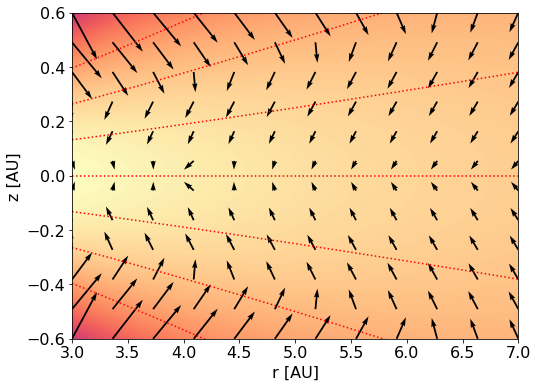

In [8]:
font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

plt.figure(figsize=(8,6))
plt.pcolormesh(z_plot2, r_plot2, rho_g,norm=colors.LogNorm(vmin=1.0e-20, vmax=amax), cmap='magma')
plt.quiver(z_plot/c.AU,r_plot/c.AU,symlog(v_r_plot),symlog(v_z_plot),width = 0.004)

#plot the disk scale heights
plt.plot(r_grid2,0.*hg,color='r',linestyle=':')
plt.plot(r_grid2,1.*hg,color='r',linestyle=':')
plt.plot(r_grid2,2.*hg,color='r',linestyle=':')
plt.plot(r_grid2,3.*hg,color='r',linestyle=':')
plt.plot(r_grid2,-1.*hg,color='r',linestyle=':')
plt.plot(r_grid2,-2.*hg,color='r',linestyle=':')
plt.plot(r_grid2,-3.*hg,color='r',linestyle=':')

plt.ylim(simulation.disk.z_min/c.AU,simulation.disk.z_max/c.AU)
plt.xlim(simulation.disk.r_min/c.AU,simulation.disk.r_max/c.AU)
plt.xlabel('r [AU]')
plt.ylabel('z [AU]')
plt.show()

In [9]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [ ]:
# Create a set of line segments so that we can color them individually
